      ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP           758                 

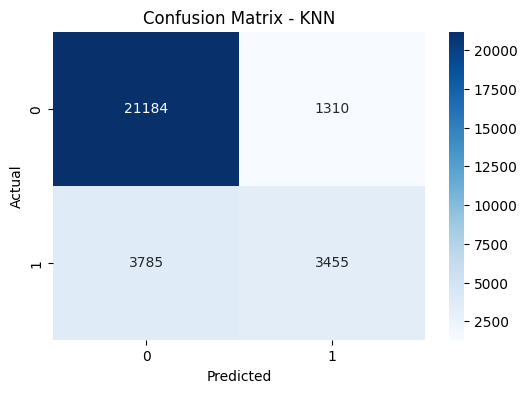

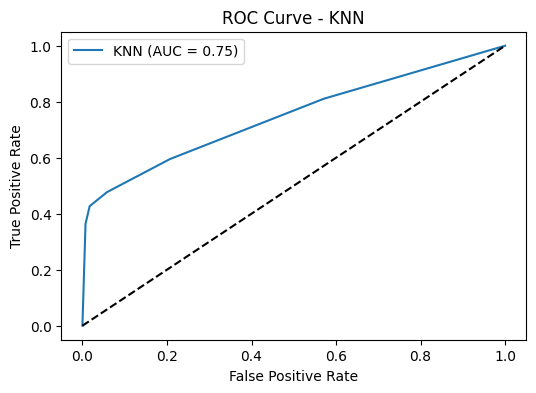


Classification Report - KNN:

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     22494
           1       0.73      0.48      0.58      7240

    accuracy                           0.83     29734
   macro avg       0.79      0.71      0.73     29734
weighted avg       0.82      0.83      0.82     29734


Training Random Forest...


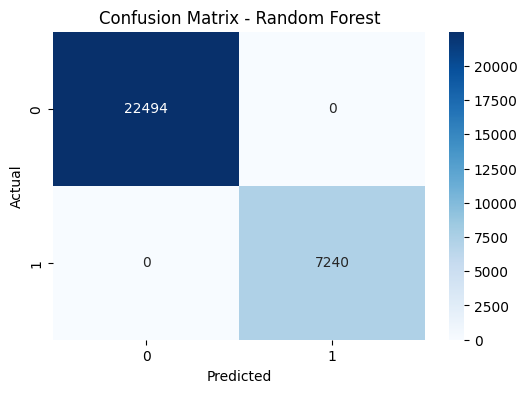

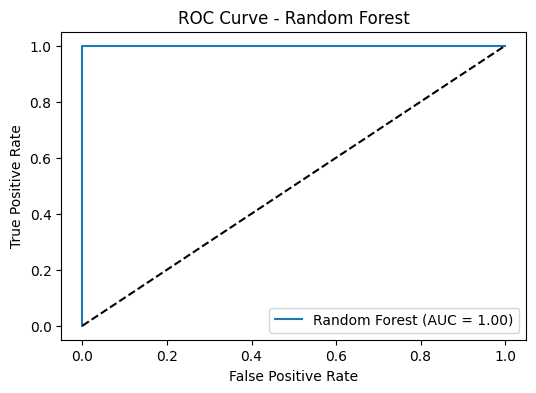


Classification Report - Random Forest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22494
           1       1.00      1.00      1.00      7240

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734


Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

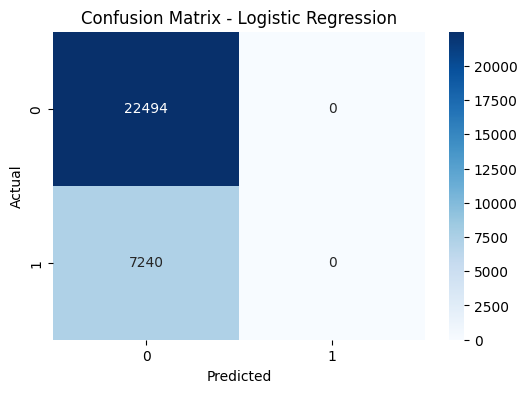

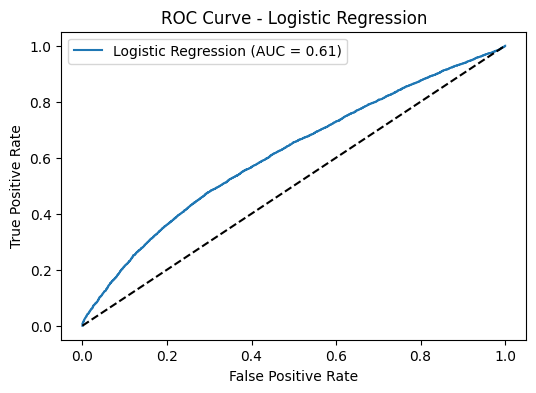


Classification Report - Logistic Regression:

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     22494
           1       0.00      0.00      0.00      7240

    accuracy                           0.76     29734
   macro avg       0.38      0.50      0.43     29734
weighted avg       0.57      0.76      0.65     29734


Training Decision Tree...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


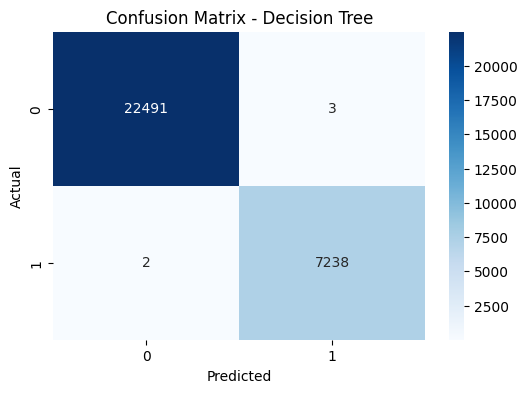

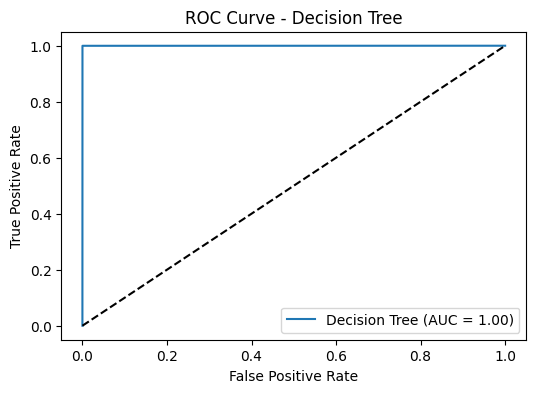


Classification Report - Decision Tree:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22494
           1       1.00      1.00      1.00      7240

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734


Training Gradient Boosting...


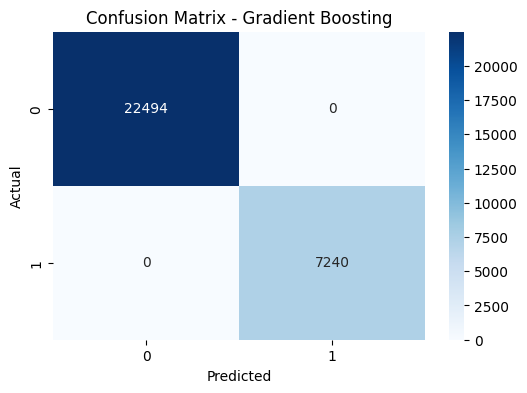

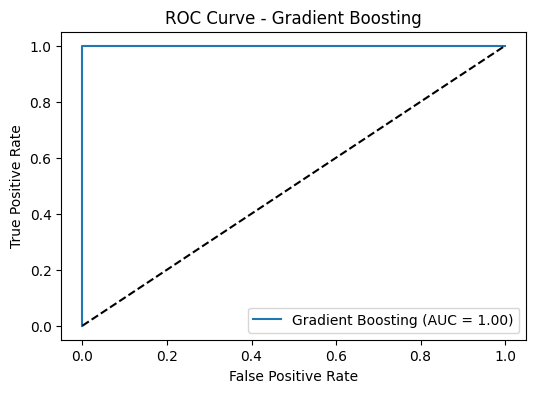


Classification Report - Gradient Boosting:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22494
           1       1.00      1.00      1.00      7240

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734


Performance Metrics for All Models:

KNN:
Accuracy: 0.8286
Precision: 0.7251
Recall: 0.4772
ROC-AUC: 0.7478
CV Accuracy: 0.8268
CV ROC-AUC: 0.7458

Random Forest:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC-AUC: 1.0000
CV Accuracy: 1.0000
CV ROC-AUC: 1.0000

Logistic Regression:
Accuracy: 0.7565
Precision: 0.0000
Recall: 0.0000
ROC-AUC: 0.6134
CV Accuracy: 0.7529
CV ROC-AUC: 0.6032

Decision Tree:
Accuracy: 0.9998
Precision: 0.9996
Recall: 0.9997
ROC-AUC: 0.9998
CV Accuracy: 0.9997
CV ROC-AUC: 0.9997

Gradient Boosting:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC-AUC: 1.0000
CV Accuracy: 1.0000
CV RO

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score
import joblib  # For saving and loading the model

# Load the dataset
data = pd.read_csv("/content/Loan_Default.csv")
# Display first few rows
print(data.head())

# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

# Summary of dataset
print(data.describe())

# Clean and preprocess the data
# Handle columns with non-numeric values like '>74' by replacing them with NaN
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce') if pd.api.types.is_numeric_dtype(data[column]) else data[column]

# Fill missing values
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Fill numeric columns with the mean
data[numeric_columns] = data[numeric_columns].apply(lambda x: x.fillna(x.mean()))

# Fill categorical columns with the mode
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Encode categorical variables
label_enc = LabelEncoder()
for col in categorical_columns:
    data[col] = label_enc.fit_transform(data[col])

# Define features and target
X = data.drop('Status', axis=1, errors='ignore')  # Features
y = data['Status'] if 'Status' in data.columns else None  # Target

if y is not None:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"Training set size: {X_train.shape}")
    print(f"Testing set size: {X_test.shape}")

    # Initialize models
    models = {
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42)
    }

    # Dictionary to store performance metrics
    performance_metrics = {}

    # Train and evaluate each model
    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else [0] * len(y_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        # Cross-validation for validation
        cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
        cv_roc_auc = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()

        # Store metrics
        performance_metrics[model_name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "ROC-AUC": roc_auc,
            "CV Accuracy": cv_accuracy,
            "CV ROC-AUC": cv_roc_auc
        }

        # Confusion Matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend()
        plt.show()

        # Classification Report
        print(f"\nClassification Report - {model_name}:\n")
        print(classification_report(y_test, y_pred))

    # Display performance metrics for all models
    print("\nPerformance Metrics for All Models:")
    for model_name, metrics in performance_metrics.items():
        print(f"\n{model_name}:")
        print(f"Accuracy: {metrics['Accuracy']:.4f}")
        print(f"Precision: {metrics['Precision']:.4f}")
        print(f"Recall: {metrics['Recall']:.4f}")
        print(f"ROC-AUC: {metrics['ROC-AUC']:.4f}")
        print(f"CV Accuracy: {metrics['CV Accuracy']:.4f}")
        print(f"CV ROC-AUC: {metrics['CV ROC-AUC']:.4f}")

    # Determine the best model based on ROC-AUC
    best_model_name = max(performance_metrics, key=lambda x: performance_metrics[x]['ROC-AUC'])
    best_model = models[best_model_name]
    print(f"\nBest Model: {best_model_name} with ROC-AUC = {performance_metrics[best_model_name]['ROC-AUC']:.4f}")

    # Save the best model to a file
    model_filename = "best_loan_default_model.pkl"
    joblib.dump(best_model, model_filename)
    print(f"\nBest model saved to {model_filename}")

    # Use the best model to predict on the test set
    y_pred_best = best_model.predict(X_test)

    # Display predictions (whether the person can pay the loan or not)
    predictions = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred_best
    })
    predictions['Loan Status'] = predictions['Predicted'].apply(lambda x: 'Can Pay' if x == 0 else 'Cannot Pay')

    print("\nPredictions for Loan Repayment on Test Data:")
    print(predictions[['Actual', 'Predicted', 'Loan Status']].head(20))  # Display first 20 predictions

else:
    print("Target column 'Status' not found in the dataset.")